# Breast Cancer identification with Logistic Regression classifier

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm

## Loading the Data


In [2]:
cancer_data = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,stratify = cancer_data.target,
    shuffle = True,random_state=144)


## Creating and training the model

In [4]:
svm_model = svm.LinearSVC(C=100.0)
svm_model.fit(X_train, y_train)

LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Analyze model performance and metrics

In [5]:
print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

Training set score: 0.918
Test set score: 0.930


In [6]:
pred_svm = svm_model.predict(X_test)

In [7]:
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[43 10]
 [ 0 90]]


In [8]:
f1_score(y_test, pred_svm)

0.9473684210526316

In [9]:
print(classification_report(y_test, pred_svm,
target_names=["malignant", "benign"]))

              precision    recall  f1-score   support

   malignant       1.00      0.81      0.90        53
      benign       0.90      1.00      0.95        90

   micro avg       0.93      0.93      0.93       143
   macro avg       0.95      0.91      0.92       143
weighted avg       0.94      0.93      0.93       143



In [10]:
fpr, tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))

In [11]:
thresholds

array([  2.91813787,   1.91813787,   1.37735943,   1.33021463,
         1.16734915,   1.16549238,   0.9755611 ,   0.96223791,
         0.88509049,   0.83382246,   0.81206431,   0.7637649 ,
         0.36432228,   0.32272586,   0.3196992 , -11.1566933 ])

In [12]:
np.argmin(np.abs(thresholds))

14

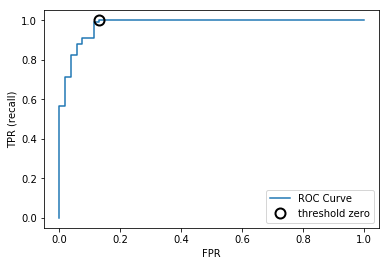

In [13]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
nearest_to_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[nearest_to_zero], tpr[nearest_to_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [14]:
auc_val = auc(fpr, tpr)
print("AUC for Logreg: {:.3f}".format(auc_val))

AUC for Logreg: 0.977


# Feature scalling for improving model performance

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
svm_model_scalled = svm.LinearSVC(C=1.0)
svm_model_scalled.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(svm_model_scalled.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model_scalled.score(X_test_scaled, y_test)))


Train set accuracy: 0.99
Test set accuracy: 0.97


In [17]:
pred_svm_scaled = svm_model_scalled.predict(X_test_scaled)

In [18]:
confusion = confusion_matrix(y_test, pred_svm_scaled)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[49  4]
 [ 1 89]]


In [19]:
f1_score(y_test, pred_svm_scaled)

0.9726775956284154

In [20]:
print(classification_report(y_test, pred_svm_scaled,
target_names=["malignant", "benign"]))

              precision    recall  f1-score   support

   malignant       0.98      0.92      0.95        53
      benign       0.96      0.99      0.97        90

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [22]:
fpr, tpr, thresholds = roc_curve(y_test, svm_model_scalled.decision_function(X_test_scaled))

In [23]:
thresholds

array([ 10.3237624 ,   9.3237624 ,   2.43479488,   2.35965527,
         1.27428825,   1.22212994,   0.38826637,   0.25661051,
         0.16861765,  -1.47531358,  -1.79445882, -24.80782754])

In [24]:
np.argmin(np.abs(thresholds))

8

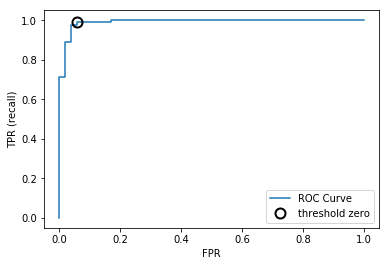

In [25]:
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
nearest_to_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[nearest_to_zero], tpr[nearest_to_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [26]:
auc_val_scalled = auc(fpr, tpr)
print("AUC for Logreg: {:.3f}".format(auc_val_scalled))

AUC for Logreg: 0.991
